<a href="https://colab.research.google.com/github/Pamgerber/Processamento_Morfologico-M3/blob/main/Pr%C3%A1tica_Processamento_Morfol%C3%B3gico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí

Escola Politécnica

Processamento Digital de Sinais: Imagens

Exercício Avalitivo de Processamento Morfológico

Professor: Felipe Viel.

Acadêmicos: Pamela Bandeira Gerber e Ismar Pedrini Neto

Tutoriais da OpenCV

(https://docs.opencv.org/master/d9/df8/tutorial_root.html)

(https://www.geeksforgeeks.org/opencv-python-tutorial/)

Processamento Morfológico

Obs: Utilize imagens em preto e branco.

**Erosão e Dilatação**

[[1 1 1]
 [1 1 1]
 [1 1 1]]

Imagem original


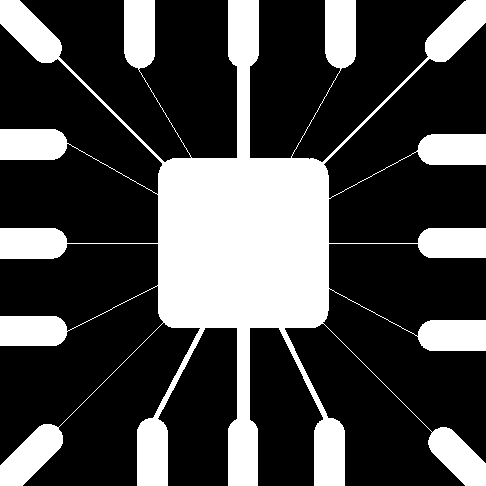

Imagem erosão


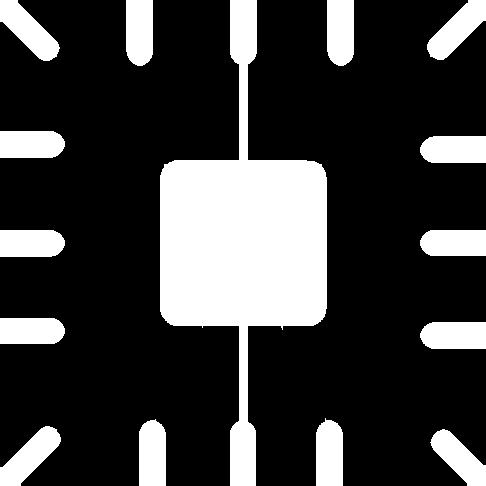


Imagem original


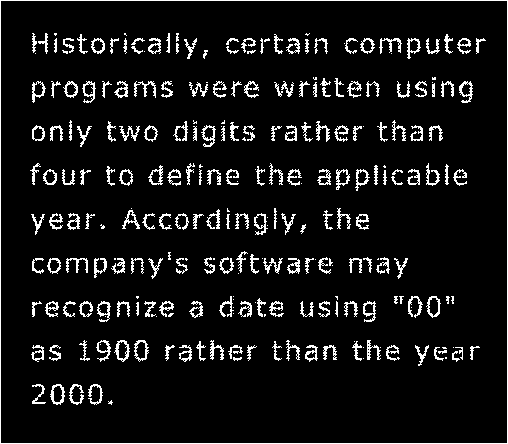

Imagem dilatação


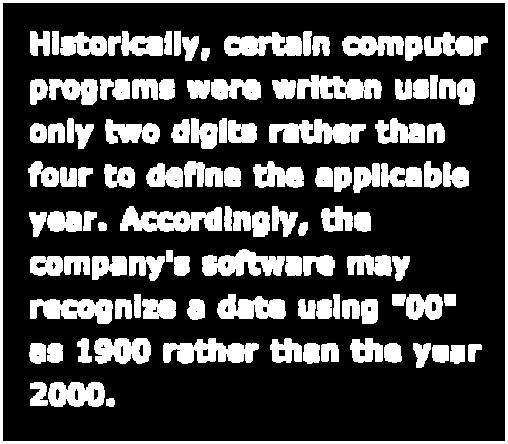

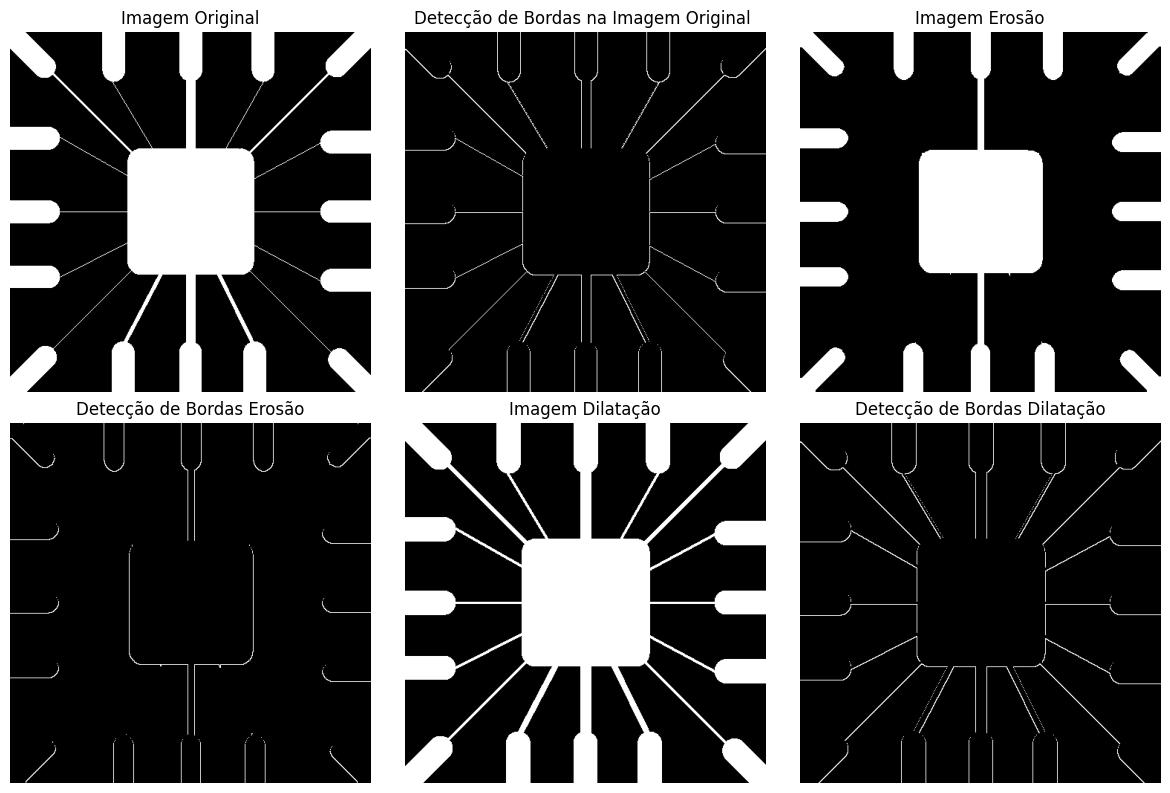


Imagem ruído erosão


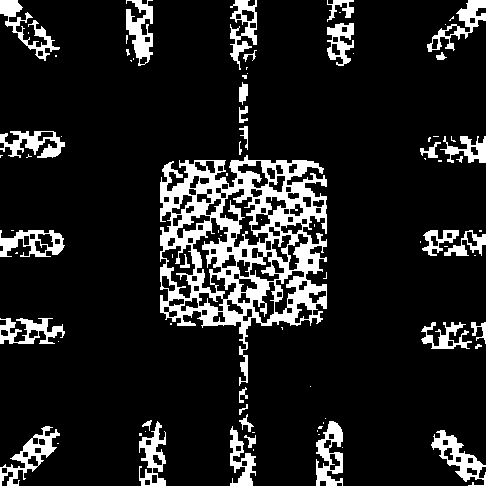


Imagem ruído dilatação


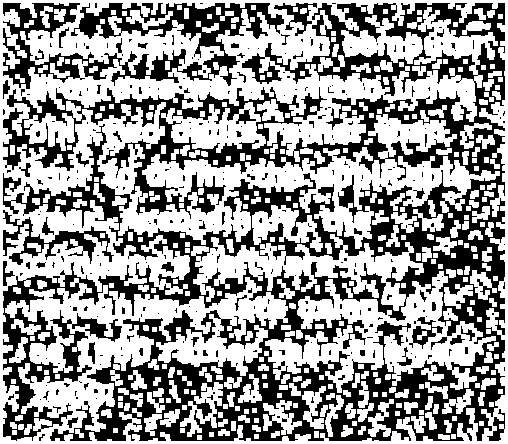

In [36]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
from matplotlib import pyplot as plt

# Define a função de erosão e dilatação de "img" e seus parâmetros
# Tanto a erosão quanto a dilatação são aplicadas duas vezes devido ao "iterations = 2"
def erosao(imagem, kernel):
    return cv2.erode(imagem, kernel, iterations = 2)

def dilatacao(imagem, kernel):
    return cv2.dilate(imagem, kernel, iterations = 2)

# Aqui são lidas as imagens com o "cv2.imread()" e cada imagem sendo atribuida a alguma variável
# O "0" (zero) após a virgula significa que estas imagens serão carregadas em escala de cinza
img_e = cv2.imread('/content/drive/MyDrive/Processamento Morfológico/Fig0905(a)(wirebond-mask).tif', 0)
img_d = cv2.imread('/content/drive/MyDrive/Processamento Morfológico/Fig0907(a)(text_gaps_1_and_2_pixels).tif', 0)

# Aqui é criado uma matriz 3x3 preenchida somente com o número 1, e é atribuido à variável "kernel"
#O "np.uint8" é o tipo de dado
kernel = np.ones((3,3),np.uint8)
print(kernel)

# São aplicadas operações morfológicas de erosão e dilatação
# Cada operação é atribuida a uma variável. Erosão para "img_e_erosao" e dilatação para "img_d_dilatacao"
img_e_erosao = erosao(img_e, kernel)
img_d_dilatacao = dilatacao(img_d, kernel)

# Ruído tipo sal e pimenta(s&p) com uma quantidade de 5% (amount=0.05)dos pixels sendo alterados p/ branco ou preto
# E Multiplica o resultado do ruído por 255 p/ normalização dos valores da imagem resultante para o intervalo de 0 a 255.
img_e_noisy = random_noise(img_e, mode='s&p', amount=0.05) * 255
img_d_noisy = random_noise(img_d, mode='s&p', amount=0.05) * 255

# Ajusta a faixa de valores p/ 0-255
#img_e_noisy = np.array(img_e_noisy, dtype=np.uint8)
#img_d_noisy = np.array(img_d_noisy, dtype=np.uint8)

# Aplica as operações nas imagens c/ ruído
img_e_noisy = erosao(img_e_noisy, kernel)
img_d_noisy = dilatacao(img_d_noisy, kernel)

# Função de detecção aplicando o Roberts na direção x e y da imagem e calcula a magnitude das bordas combinando as detecções usando pitágoras e a normalizando.
def deteccao_roberts(imagem):
    roberts_x = cv2.filter2D(imagem, -1, np.array([[1, 0], [0, -1]]))
    roberts_y = cv2.filter2D(imagem, -1, np.array([[0, 1], [-1, 0]]))
    magnitude = np.sqrt(roberts_x**2 + roberts_y**2)
    magnitude = np.uint8(magnitude)

    return magnitude

img_deteccao = cv2.imread('/content/drive/MyDrive/Processamento Morfológico/Fig0905(a)(wirebond-mask).tif', 0)

# Detecção antes da erosão/dilatação
bordas_roberts_antes = deteccao_roberts(img_deteccao)

# Detecção depois da erosão
bordas_roberts_erosao = deteccao_roberts(img_e_erosao)

# Detecção depois da dilatação
img_dilatada = cv2.dilate(img_deteccao, kernel)
bordas_roberts_dilatacao = deteccao_roberts(img_dilatada)

print("\nImagem original")
cv2_imshow(img_e)
print("Imagem erosão")
cv2_imshow(img_e_erosao)

print("\nImagem original")
cv2_imshow(img_d)
print("Imagem dilatação")
cv2_imshow(img_d_dilatacao)

plt.figure(figsize=(12, 8))

plt.subplot(231), plt.imshow(img_deteccao, cmap='gray')
plt.title('Imagem Original'), plt.axis('off')

plt.subplot(232), plt.imshow(bordas_roberts_antes, cmap='gray')
plt.title('Detecção de Bordas na Imagem Original '), plt.axis('off')

plt.subplot(233), plt.imshow(img_e_erosao, cmap='gray')
plt.title('Imagem Erosão'), plt.axis('off')

plt.subplot(234), plt.imshow(bordas_roberts_erosao, cmap='gray')
plt.title('Detecção de Bordas Erosão'), plt.axis('off')

plt.subplot(235), plt.imshow(img_dilatada, cmap='gray')
plt.title('Imagem Dilatação'), plt.axis('off')

plt.subplot(236), plt.imshow(bordas_roberts_dilatacao, cmap='gray')
plt.title('Detecção de Bordas Dilatação'), plt.axis('off')

plt.tight_layout()
plt.show()

# Resultados com ruído
print("\nImagem ruído erosão")
cv2_imshow(img_e_noisy)
print("\nImagem ruído dilatação")
cv2_imshow(img_d_noisy)

Relate as observações visíveis nas imagens de saída com os processamentos aplicados, descrevendo o comportamento visual em relação as bordas, junção, perda de informação e mlhoria na qualidade visual.

*   A erosão encolhe as bordas dos objetos na imagem, tendo a separação de
objetos que estavam conectados, levando à perda de pequenos detalhes e informações, porém remove ruídos caso for do desejo.

*   Já na dilatação se expande as bordas dos objetos na imagem, resultando na conexão dos objetos que estavam separados. Porém também pode levar à perda de pequenos detalhes, como lacunas e espaços entre os objetos. Ele é útil para preenchimentos de buracos e conectar objetos.

Aplique o seu algoritmo de detecção de borda (roberts ou sobel) a imagem ImagensMorfologia/Fig0905(a)(wirebond-mask) antes e depois de utilizar a dilatação/erosão e relate os resultados.

*   Antes da dilatação/erosão a detecção de bordas na imagem original destaca todas as bordas presentes na imagem, incluindo os detalhes menores.

*   Após a erosão, já que este encolhe os objetos na imagem, algumas bordas, especialmente aquelas de objetos menores desaparecem. Portanto, a imagem pode ter menos bordas em comparação com a imagem original.

*   No após a dilatação, por esta expandir os objetos na imagem, novas bordas são formadas, especialmente onde os objetos se encontram. Portanto, a imagem pode ter mais ou diferentes bordas em comparação com a imagem original.





**Abertura e Fechamento**

[[1 1 1]
 [1 1 1]
 [1 1 1]]
Imagem original


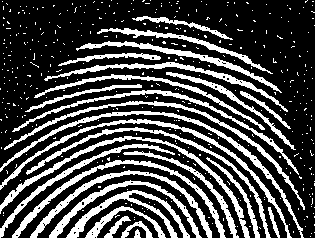


Imagem abertura


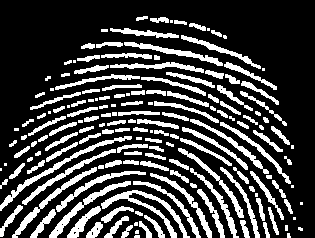


Imagem fechamento


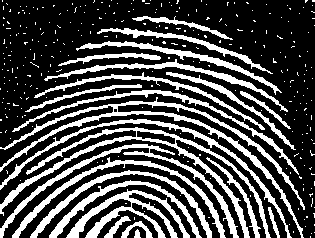

Imagem original


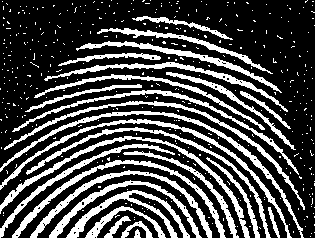

Imagem Erosão


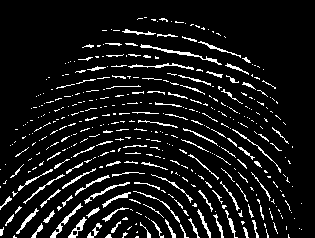

Imagem Abertura


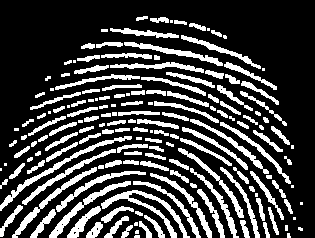

Imagem Dilatação da Abertura


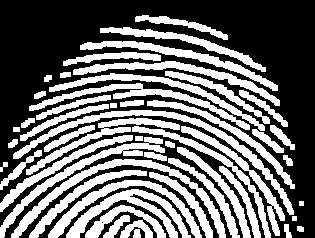

Imagem Fechamento


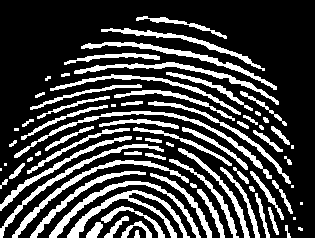

In [37]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Define a função de abertura e fechamento de "img" e seus parâmetros
# Tanto a abertura quanto a fechamento são aplicadas uma vez devido ao "iterations = 1"
def abertura(imagem, kernel):
    img_erosao = cv2.erode(imagem, kernel, iterations = 1)
    return cv2.dilate(img_erosao, kernel, iterations = 1)

def fechamento(imagem, kernel):
    img_dilatacao = cv2.dilate(imagem, kernel, iterations = 1)
    return cv2.erode(img_dilatacao, kernel, iterations = 1)

# Aqui são lidas as imagens com o "cv2.imread()" e cada imagem sendo atribuida a alguma variável
# O "0" (zero) após a virgula significa que estas imagens serão carregadas em escala de cinza
img_a = cv2.imread('/content/drive/MyDrive/Processamento Morfológico/Fig0911(a)(noisy_fingerprint).tif', 0)
img_f = cv2.imread('/content/drive/MyDrive/Processamento Morfológico/Fig0911(a)(noisy_fingerprint).tif', 0)
img = cv2.imread('/content/drive/MyDrive/Processamento Morfológico/Fig0911(a)(noisy_fingerprint).tif', 0)

# Aqui é criado uma matriz 3x3 preenchida somente com o número 1, e é atribuido à variável "kernel"
#O "np.uint8" é o tipo de dado
kernel = np.ones((3,3),np.uint8)
print(kernel)

# São aplicadas operações morfológicas de abertura e fechamento
# Cada operação é atribuida a uma variável. Abertura para "img_abertura" e fechamento para "img_fechamento"
img_abertura = abertura(img_a, kernel)
img_fechamento = fechamento(img_f, kernel)

print("Imagem original")
cv2_imshow(img_a)
print("\nImagem abertura")
cv2_imshow(img_abertura)
print("\nImagem fechamento")
cv2_imshow(img_fechamento)

# Aplicando a filtragem

erosao = cv2.erode(img, kernel)

abertura = cv2.dilate(erosao, kernel)

dilatacao_abertura = cv2.dilate(abertura, kernel)

fechamento = cv2.erode(dilatacao_abertura, kernel)

# Resultados do processamento morfológico
print("Imagem original")
cv2_imshow(img)
print("Imagem Erosão")
cv2_imshow(erosao)
print("Imagem Abertura")
cv2_imshow(abertura)
print("Imagem Dilatação da Abertura")
cv2_imshow(dilatacao_abertura)
print("Imagem Fechamento")
cv2_imshow(fechamento)

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
